In [1]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [2]:
# ワインデータセットの読み込み
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

# 先頭5行の表示
pd.DataFrame(df.head())

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# データフレームの形状
print('dfの形状', df.shape)

dfの形状 (178, 14)


In [4]:
# 特徴量に色（10列）とプロリンの量(13列)を選択
X = df.iloc[:,[10,13]].values
# 正解ラベルの設定(ラベルはゼロから開始するようマイナス1する)
y = df.iloc[:, 0].values -1
# 特徴量と正解ラベルの先頭5行を表示
X[:5], y[:5]

(array([[   5.64, 1065.  ],
        [   4.38, 1050.  ],
        [   5.68, 1185.  ],
        [   7.8 , 1480.  ],
        [   4.32,  735.  ]]),
 array([0, 0, 0, 0, 0], dtype=int64))

In [5]:
df.iloc[:,0].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [6]:
# sklearnのデータセットを使用する場合はコメントアウト
#from sklearn import datasets
#wine = datasets.load_wine()
#X = wine.data[:,[9,12]]
#y = wine.target
#X[:5], y[:5]

In [7]:
# 特徴量と正解ラベルを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X_trainの形状：',X_train.shape,' y_trainの形状：', y_train.shape,' X_testの形状：', X_test.shape,' y_testの形状：', y_test.shape)

X_trainの形状： (142, 2)  y_trainの形状： (142,)  X_testの形状： (36, 2)  y_testの形状： (36,)


In [8]:
# 特徴量の標準化
sc = StandardScaler()
# 訓練データを変換器で標準化
X_train_std = sc.fit_transform(X_train)
# テストデータを作成した変換器で標準化
X_test_std = sc.transform(X_test)

In [9]:
# ロジスティック回帰モデルを作成
model = LogisticRegression(max_iter=100, multi_class = 'ovr', solver='liblinear', C=1.0, penalty='l2', l1_ratio=None, random_state=0)

# モデルの訓練
model.fit(X_train_std, y_train)

LogisticRegression(multi_class='ovr', random_state=0, solver='liblinear')

In [10]:
# 訓練データで正解率を計算
y_train_pred = model.predict(X_train_std)
ac_score = accuracy_score(y_train, y_train_pred)
print('正解率 = %.2f' % (ac_score))

正解率 = 0.90


In [11]:
# テストデータで正解率を計算
y_test_pred = model.predict(X_test_std)
ac_score = accuracy_score(y_test, y_test_pred)
print('正解率 = %.2f' % (ac_score))

正解率 = 0.89


<Axes: >

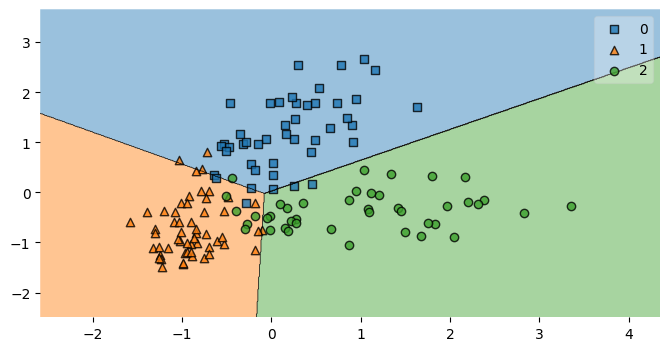

In [12]:
# ロジスティック回帰モデルによる訓練データのプロット
plt.figure(figsize=(8,4)) #プロットのサイズ指定
plot_decision_regions(X_train_std, y_train, model)

<Axes: >

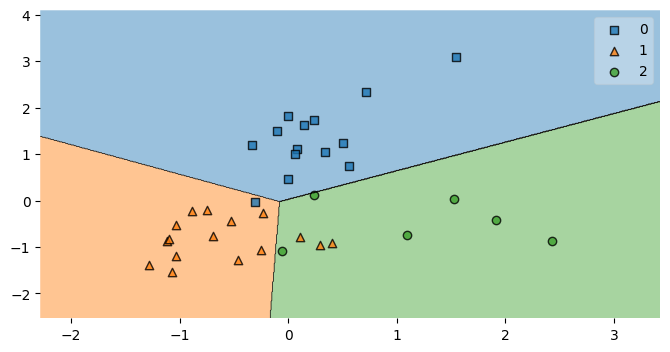

In [13]:
#  ロジスティック回帰モデルによるテストデータのプロット
plt.figure(figsize=(8,4)) #プロットのサイズ指定
plot_decision_regions(X_test_std, y_test, model) 

In [14]:
print(model.coef_) #傾き
print(model.intercept_) #切片

[[-0.23097107  3.11691154]
 [-3.2104044  -1.55381856]
 [ 2.77329907 -1.76440548]]
[-1.2458111  -1.58068466 -1.11200045]


In [15]:
new_data = [[0.1,-0.1]] # 未知データの作成 
print('ロジスティック回帰')
print('予測',model.predict(new_data)) # 未知データの分類予測
print('スコア',model.decision_function(new_data)) # 未知データのスコア
print('確率',model.predict_proba(new_data)) # 未知データの確率

ロジスティック回帰
予測 [2]
スコア [[-1.58059936 -1.74634324 -0.65823   ]]
確率 [[0.25851263 0.22489203 0.51659534]]


In [16]:
# 未知データの色とプロリンの標準化前の特徴量
sc.inverse_transform(new_data)

array([[  5.28241286, 712.05964791]])

In [17]:
# ソフトマックス回帰モデルを作成
model2 = LogisticRegression(max_iter=100, multi_class = 'multinomial', solver='lbfgs', C=1.0, penalty='l2', l1_ratio=None, random_state=0)

# モデルの訓練
model2.fit(X_train_std, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [18]:
# 訓練データで正解率を計算
y_train_pred = model2.predict(X_train_std)
ac_score = accuracy_score(y_train, y_train_pred)
print('正解率 = %.2f' % (ac_score))

正解率 = 0.89


In [19]:
# テストデータで正解率を計算
y_test_pred = model2.predict(X_test_std)
ac_score = accuracy_score(y_test, y_test_pred)
print('正解率 = %.2f' % (ac_score))

正解率 = 0.89


In [20]:
print('ソフトマックス回帰')
print('予測',model2.predict(new_data)) # 未知データの分類予測
print('スコア',model2.decision_function(new_data)) # 未知データのスコア
print('確率',model2.predict_proba(new_data)) # 未知データの確率

ソフトマックス回帰
予測 [2]
スコア [[-0.01353225 -0.73503349  0.74856574]]
確率 [[0.27557402 0.13393506 0.59049092]]


<Axes: >

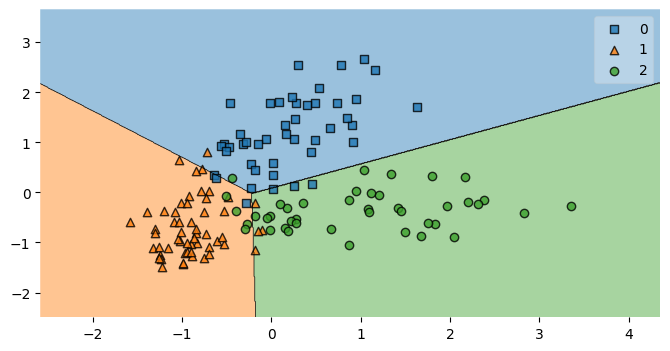

In [21]:
# ソフトマックス回帰モデルによる訓練データのプロット
plt.figure(figsize=(8,4)) #プロットのサイズ指定
plot_decision_regions(X_train_std, y_train, model2)

<Axes: >

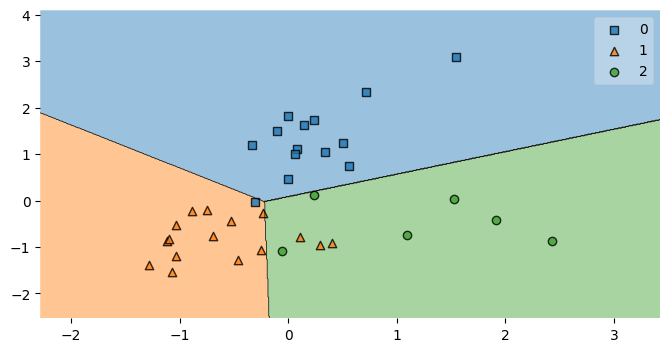

In [22]:
# ソフトマックス回帰モデルによるテストデータのプロット
plt.figure(figsize=(8,4)) #プロットのサイズ指定
plot_decision_regions(X_test_std, y_test, model2) 

In [23]:
print(model2.coef_) #傾き
print(model2.intercept_) #切片

[[ 0.50595063  2.20025279]
 [-2.58929427 -1.14099688]
 [ 2.08334364 -1.05925592]]
[ 0.15589797 -0.59020375  0.43430578]
